Practical 7 : Support Vector Machine

ID : 21CE142

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# I installed openpyxl to read the dataset.
!pip install openpyxl

# Data Review <a id = "1"></a>

In [3]:
# Reading data with pandas library.
data = pd.read_excel('./RaisinDataset/Raisin_Dataset.xlsx', engine="openpyxl")

In [4]:
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [5]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [7]:
# Dataset Values(Max, min, std..)
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [8]:
# Data Correlation: Relationship between columns
data.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


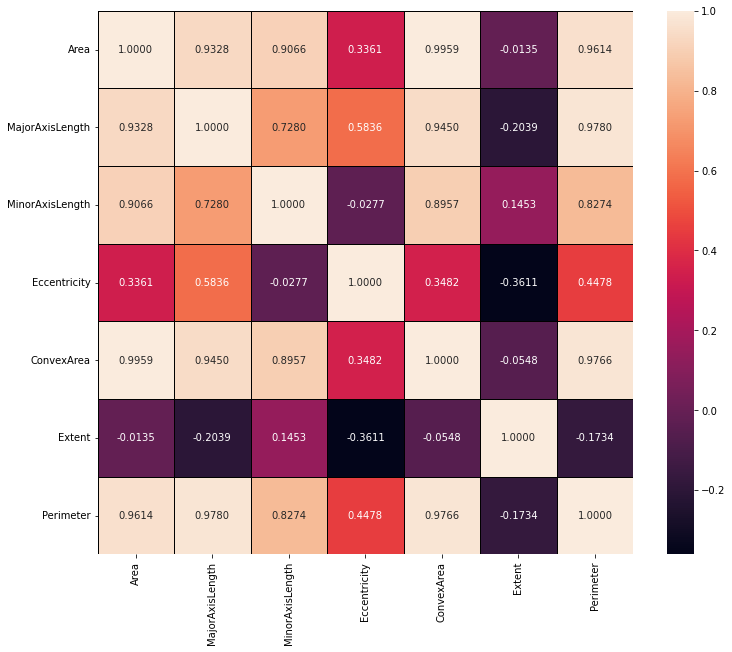

In [9]:
# Visualization of correlation result with seaborn library heatmap.
f, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data.corr(), annot = True, linewidths=0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

When I looked at correlation I generally am seeing direct proportion in between the columns.

In [29]:
# Visualization of correlation results with seaborn library pairplot
#sns.pairplot(data, hue = "Class")

In [30]:
# Dataset columns names
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

# Data Visuzalization <a id = "2"></a>

Kecimen    450
Besni      450
Name: Class, dtype: int64

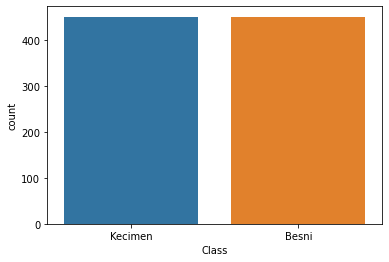

In [12]:
# First Visual
# The number of Class in the dataset and its graphic.
sns.countplot(x = "Class", data = data)
data.loc[:,"Class"].value_counts()

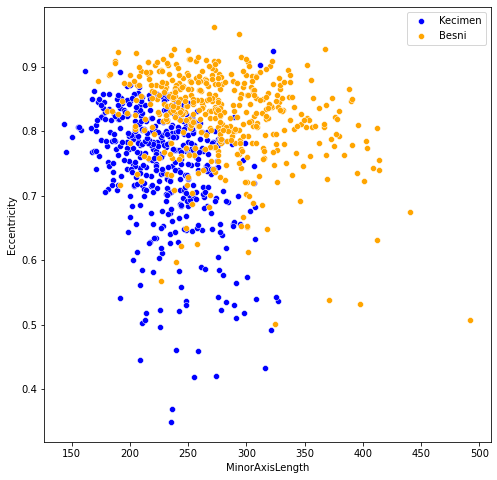

In [13]:
# Second Visual
Kecimen = data[data.Class == "Kecimen"]
Besni = data[data.Class == "Besni"]

plt.figure(figsize = (8,8))
plt.scatter(Kecimen.MinorAxisLength, Kecimen.Eccentricity, color = "blue", label = "Kecimen", linewidths=0.5 ,edgecolors="white")
plt.scatter(Besni.MinorAxisLength, Besni.Eccentricity, color = "orange", label = "Besni", linewidths=0.5, edgecolors="white")
plt.xlabel("MinorAxisLength")
plt.ylabel("Eccentricity")
plt.legend()
plt.show()

# Support Vector Machine(SVM) <a id = "3"></a>

In [14]:
# Read dataset
data_svm = pd.read_excel('RaisinDataset/Raisin_Dataset.xlsx', engine="openpyxl")

In [15]:
data_svm

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,Besni
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,Besni
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,Besni
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,Besni


In [16]:
# Change class type.
# Kecimen = 1
# Bensi = 0
data_svm.Class = [1 if i == "Kecimen" else 0 for i in data.Class]

In [17]:
data_svm

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,1
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,1
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,1
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,1
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,1
...,...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072,0
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252,0
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828,0
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548,0


In [18]:
# x_data
x_data = data_svm.drop(["Class"], axis = 1)

#y_data
y_data = data_svm.Class.values

In [19]:
x_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251
...,...,...,...,...,...,...,...
895,83248,430.077308,247.838695,0.817263,85839,0.668793,1129.072
896,87350,440.735698,259.293149,0.808629,90899,0.636476,1214.252
897,99657,431.706981,298.837323,0.721684,106264,0.741099,1292.828
898,93523,476.344094,254.176054,0.845739,97653,0.658798,1258.548


In [20]:
y_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [21]:
#Normalization
x_data = (x_data - np.min(x_data))/(np.max(x_data) - np.min(x_data))

C:\Users\Mrugendra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\Mrugendra\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [22]:
x_data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,0.296370,0.280714,0.314376,0.767872,0.255504,0.831422,0.271791
1,0.237427,0.234638,0.284945,0.738636,0.208864,0.667854,0.241842
2,0.312263,0.280741,0.351778,0.733009,0.268084,0.565754,0.283594
3,0.097973,0.078935,0.186620,0.548194,0.084089,0.701809,0.108284
4,0.257660,0.164011,0.422064,0.350968,0.219472,0.906315,0.218493
...,...,...,...,...,...,...,...
895,0.275975,0.264945,0.298733,0.763836,0.236831,0.634192,0.245347
896,0.295540,0.278757,0.331595,0.749761,0.256905,0.563259,0.286325
897,0.354240,0.267056,0.445044,0.608017,0.317858,0.792897,0.324126
898,0.324983,0.324902,0.316915,0.810259,0.283698,0.612254,0.307635


In [23]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state = 1)

## Traning Model <a id = "svm2"></a>

In [24]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)

svm.fit(x_train, y_train)

print("print accuracy of svm algo:", svm.score(x_test, y_test))

print accuracy of svm algo: 0.9037037037037037


C:\Users\Mrugendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mrugendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


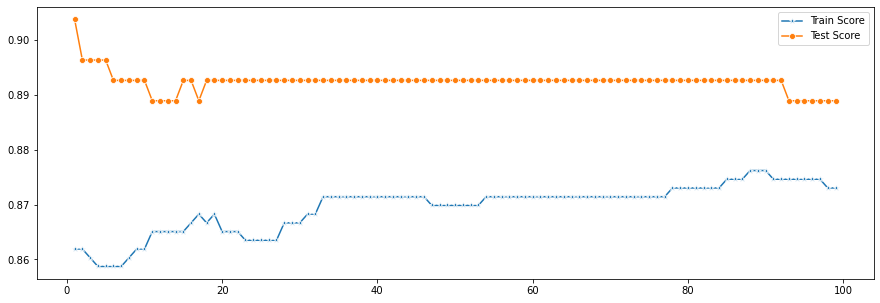

In [25]:
test_score_list = []
train_score_list = []

for i in range(1,100):
    svm2 = SVC(C = i)
    svm2.fit(x_train, y_train)
    test_score_list.append(svm2.score(x_test, y_test))
    train_score_list.append(svm2.score(x_train, y_train))
    
plt.figure(figsize=(15,5))
p = sns.lineplot(range(1,100),train_score_list,marker='*',label='Train Score')
p = sns.lineplot(range(1,100),test_score_list,marker='o',label='Test Score')

In [26]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

grid={"C":[1, 100, 1000],"kernel":["linear","poly","sigmoid"]}

svm3 = SVC(random_state = 1)

svm3.fit(x_train, y_train)

print("test accuracy {}".format(svm3.score(x_test,y_test)))
print("Train accuracy {}".format(svm3.score(x_train, y_train)))

svm3_gscv=GridSearchCV(svm3,grid,cv=10)
svm3_gscv.fit(x_test,y_test)

test accuracy 0.9037037037037037
Train accuracy 0.861904761904762


GridSearchCV(cv=10, estimator=SVC(random_state=1),
             param_grid={'C': [1, 100, 1000],
                         'kernel': ['linear', 'poly', 'sigmoid']})

In [27]:
print("best hyperparameters: ", svm3_gscv.best_params_)
print("accuracy: ", svm3_gscv.best_score_)

best hyperparameters:  {'C': 1, 'kernel': 'poly'}
accuracy:  0.8925925925925926


In [36]:
from sklearn.svm import SVC
svm4 = SVC(C = 1, kernel="poly")

print("test accuracy: {} ".format(svm4.fit(x_test, y_test).score(x_test, y_test)))
print("train accuracy: {} ".format(svm4.fit(x_train, y_train).score(x_train, y_train)))

test accuracy: 0.9037037037037037 
train accuracy: 0.8523809523809524 
